In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')


In [2]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())


Dataset Preview:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Popu

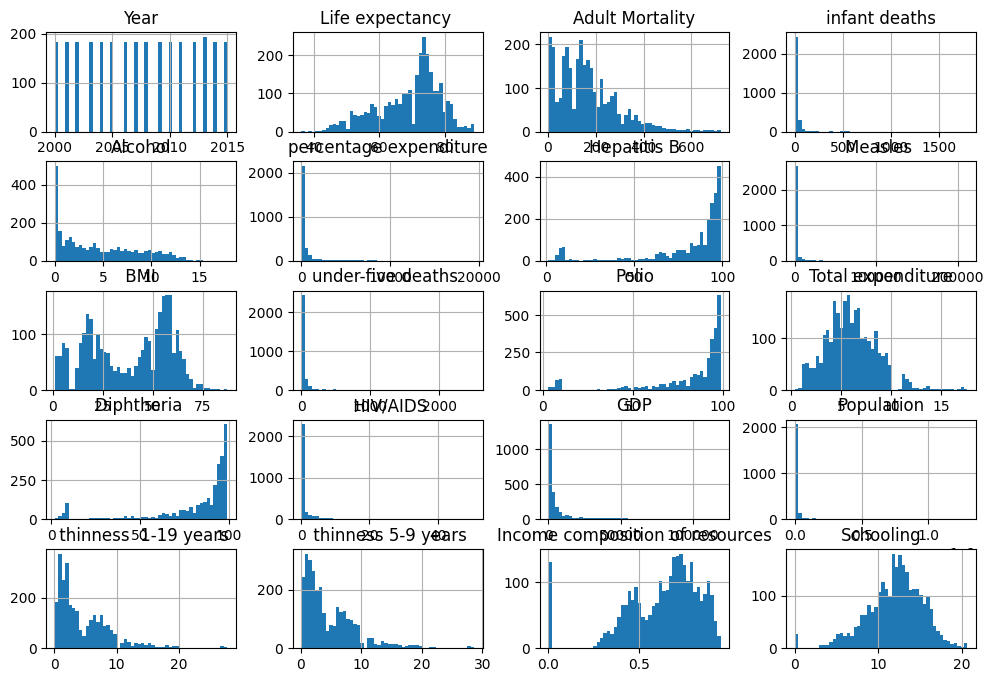

In [3]:
# Visualize the distributions of numeric columns
data.hist(bins=50, figsize=(12, 8))
plt.show()


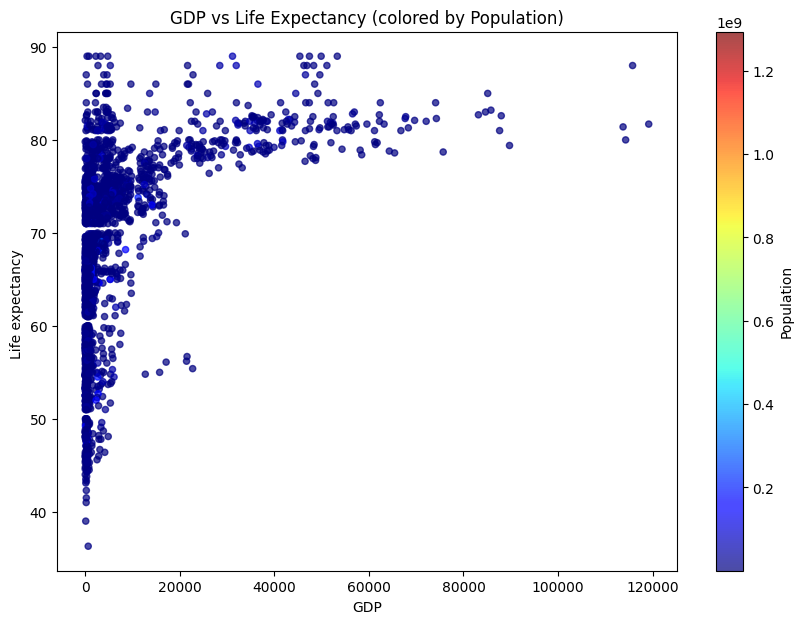

In [4]:
# Scatter plot for GDP vs Life expectancy
data.plot(kind="scatter", x="GDP", y="Life expectancy ", alpha=0.7, figsize=(10, 7), c='Population', cmap='jet', colorbar=True)
plt.title("GDP vs Life Expectancy (colored by Population)")
plt.show()

In [5]:
# Check for missing values
print("Missing Values Count:")
print(data.isna().sum())

Missing Values Count:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [6]:
# Display data types
print("Data Types:")
print(data.dtypes)

Data Types:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [7]:
# Simple Linear Regression: GDP vs Life expectancy
X = data[["GDP"]].fillna(0)  # Replace NaN values for simplicity
y = data["Life expectancy "].fillna(data["Life expectancy "].mean())  # Replace NaN in target with mean

In [8]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train.values, y_train)

LinearRegression()

In [10]:
# Make predictions
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [11]:
# Calculate R² Score
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.2150891839537259


In [12]:
# Display the intercept of the model
print("Intercept:", lr.intercept_)

Intercept: 67.38467808598412


In [13]:
# Check prediction for the first instance in the dataset
print("Prediction for the first row:", lr.predict(X[0:1]))

Prediction for the first row: [67.56015532]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [14]:
# Save and load the model
import pickle


In [15]:
# Save the model to a file
with open('life_expectancy_model.pkl', 'wb') as f:
    pickle.dump(lr, f)


In [16]:
# Load the saved model
with open('life_expectancy_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [17]:
# Test loaded model
print("Loaded Model Predictions:", loaded_model.predict(X[0:5]))

Loaded Model Predictions: [67.56015532 67.56869622 67.57441726 67.58589451 67.40376095]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [18]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual  Predicted
2546    73.7  67.913954
650     75.9  70.797583
1740    74.2  69.173856
177     76.8  74.888221
1377    51.9  67.397887
